In [3]:
%matplotlib inline

import numpy as np
import sys
from scipy import special, stats
from scipy.optimize import minimize, fminbound
import random
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle

matplotlib.rcParams['figure.figsize'] = (20,10)
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['legend.handlelength'] = 2
matplotlib.rcParams['lines.linewidth'] = 3

<div class="alert alert-danger"><b>Ce notebook est à remplir au fur et à mesure du cours et constituera votre rapport sur les trois premières journées de cours. Les questions entourées du symbole $\star$ sont à traiter en dehors du cours.</b></div>

<h1 class="text-center">EISC-211 : Méthodes de Monte-Carlo</h1>

<a id="INTROMARKOV"></a><h1 style="border: 5px solid; text-align: center; padding: 10px">V. Introduction aux chaînes de Markov</h1>

<h2> V.1. Vitesse(s) de convergence(s)</h2>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.1.</b> La fonction suivante génère une suite $(X_t)$ : quelles sont les valeurs prises par cette suite ? Expliquez simplement sa dynamique.</p>

In [4]:
def Markov_intro(t_max, p, init):
    X = np.zeros(t_max)
    X[0] = init
    for time in range(1, t_max):
        if (np.random.random() < p):
            X[time] = X[time-1];
        else:
            X[time] = 1 - X[time-1];
    return X

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.1.</b> La suite de taille t_max prend comme valeur initial un valeur donné de probabilité. Pour les autres valeurs de la suite, une tirage aleatoire est fait. Si le valeur est plus petit que une probabilité p, le valeur suivante de la suite prend le valeur avant. Sinon, il prend le complementaire du valeur avant. Ainsi, nous pouvons dire que la probabilité des états de la suite changer de valeur est égal à p-1.</div>

<div class="alert alert-success"> On dit qu'une suite $(Y_n)$ satisfait le <b>théorème ergodique</b> si la suite $(\bar Y_N)$ des moyennes empirique converge presque sûrement vers une constante, <i>i.e.</i> s'il existe une constante $\mu$ telle que $\displaystyle \bar Y_N = \frac{1}{N} \sum_{k=1}^N Y_k \xrightarrow[N \to \infty]{p.s.} \mu. $ </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.2.</b> Une suite i.i.d. satisfait-elle le théorème ergodique ? Justifiez votre réponse.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.2.</b> Oui, une suite i.i.d est un cas particulier du théorème ergodique, donc, à cause du théorème des grandes nombres, la loi est satisfait.</div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.3.</b> Utilisez le script suivant pour vérifier que $(X_t)$ satisfait le théorème ergodique. Pour quelles valeurs de $p$ la convergence est-elle la plus rapide ? La condition initiale joue-t-elle un rôle ? Expliquez pourquoi.</p>

Text(0,0.5,'Moyenne empirique')

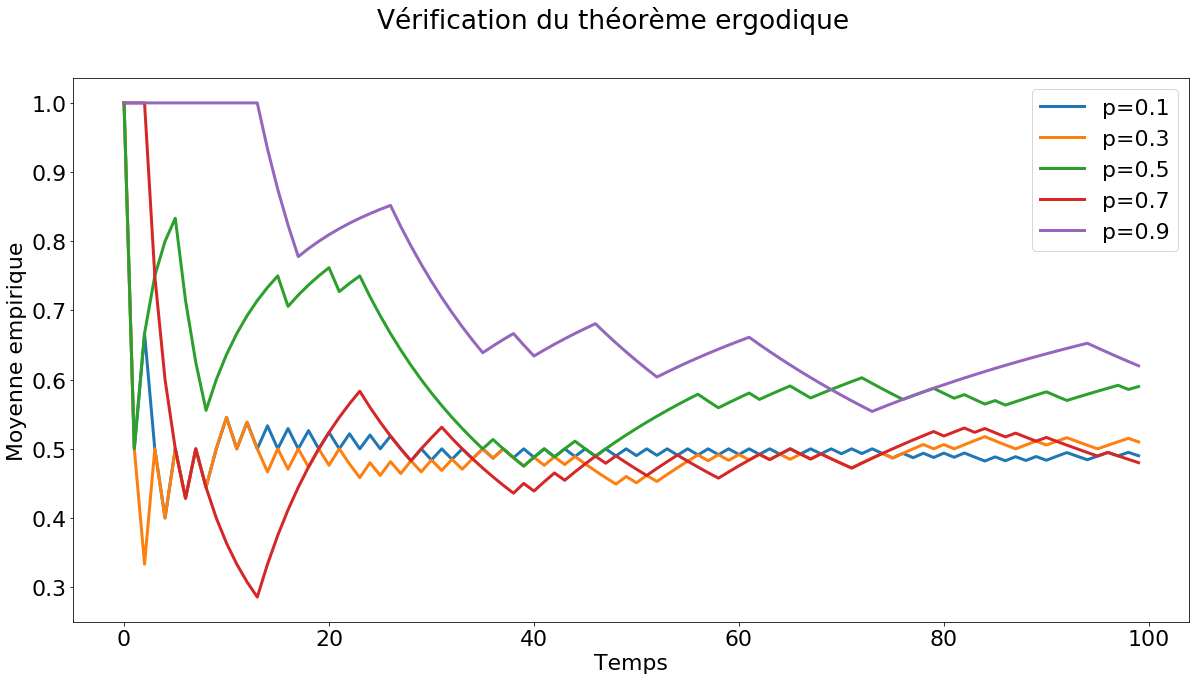

In [5]:
t_max = 10**2
val_p = np.arange(.1,1,.2)
nb_p = len(val_p)

fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    traj = Markov_intro(t_max, p, 1)
    ax.plot(range(t_max), np.divide(np.cumsum(traj), range(1,1+len(traj))), label="p="+str(p))
plt.legend()
plt.suptitle("Vérification du théorème ergodique")
plt.xlabel("Temps")
plt.ylabel("Moyenne empirique")

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.3.</b> Les valeurs petites de p atteindre la convergance de façon plus rapide. La condition initialle ne joue pas un role dans la convergence à cause du théorème érgodique. Il change juste la dynamique initiale. Alors, la probabilité que le système soit dans un état donné est constante, invariante au cours du temps aprés le temps de mélange. La condition initiale est deterministe.</div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.4.</b> Pour quelle(s) valeur(s) de $p$ la suite $(X_t)$ est-elle i.i.d.? Concluez.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.4.</b> p = 1/2 parce que p = 1 - p. La probabilité d'atteindre un état est toujours 0.5. Donc les Xk sont i.i.ds.</div>

<div class="alert alert-success"> On rappelle qu'une suite $(Y_n)$ de variables aléatoires à valeurs entières converge en loi vers une variable aléatoire $Y_\infty$, ce que l'on note $Y_n \stackrel{\text{d}}{\to} Y_\infty$, si $P(Y_n = k) \to P(Y_\infty = k)$ pour tout $k \in \mathbb{N}$. </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.5.</b> Proposez une méthode numérique pour vérifier que $X_n \stackrel{\text{L}}{\to} X_\infty$.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.5.</b> Lancer au meme temps plusieurs chaines de Markov e prendre les derniers. On suppose qui les états pris sont indépendents extre eux et l'ensemble donne une chaine de Markov de variables indépendents.</div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.6.</b> Complétez le script suivant pour vérifier numériquement que $X_n \stackrel{\text{L}}{\to} X_\infty$. Quelle est la limite ? Dépend-elle de $p$? Expliquez comment jouer sur la condition initiale pour que la chaîne de Markov démarre directement à l'équilibre.</p>

Text(0,0.5,'Estimation de la loi')

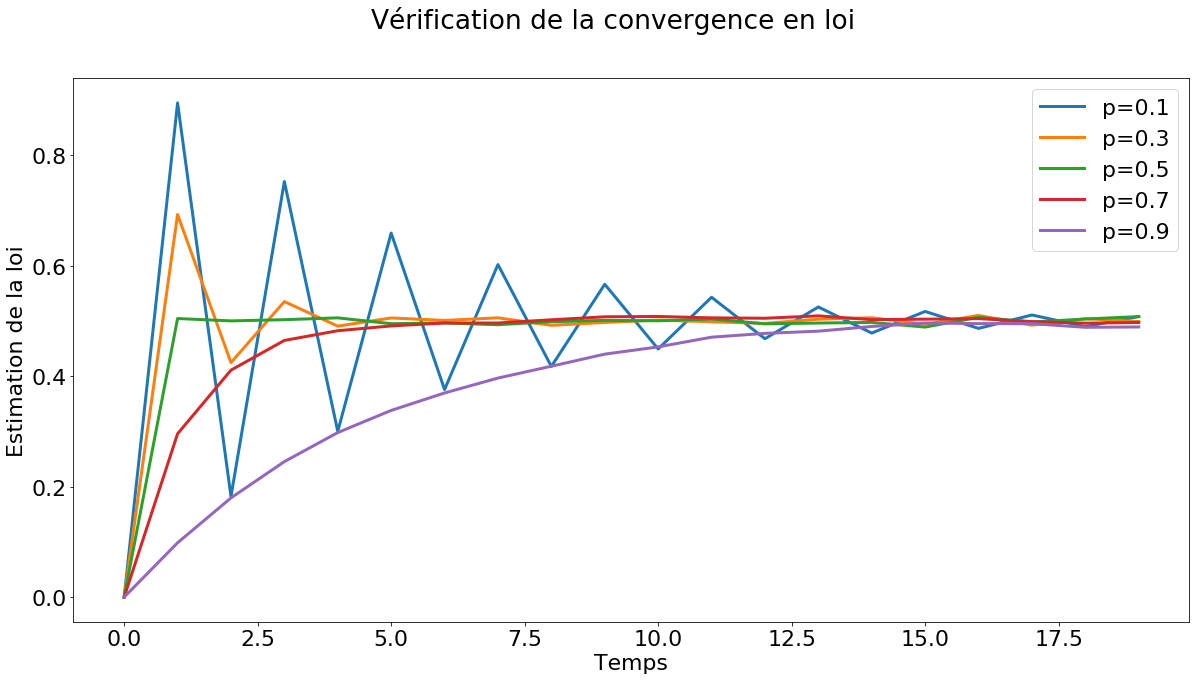

In [6]:
t_max = 2*10**1
taille_echantillon = 10**4
val_p = np.arange(.1,1.1,.2)
nb_p = len(val_p)

fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    echantillon = np.zeros((taille_echantillon, t_max))
    for j in range(taille_echantillon):
        echantillon[j,:] = Markov_intro(t_max, p, 0) # lancement de plusieurs chaines de markov
    
    estimation_loi = sum(echantillon)/taille_echantillon # moyenne de 5000 premiers termes
    #print((estimation_loi))
    ax.plot(range(t_max), estimation_loi, label="p="+str(p))
plt.legend()
plt.suptitle("Vérification de la convergence en loi")
plt.xlabel("Temps")
plt.ylabel("Estimation de la loi")

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.6.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.7.</b> Pour quelles valeurs de $p$ la convergence est-elle la plus rapide ? Comparez à la réponse de la question V.1.3 et commentez.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.7.</b> Pour valeurs de p proche de 0.5 la convergence est la plus rapide. L'eauilibre est attendue de façon beaucoup plus rapide qui dans la question 3. Dans le cas present, nous faisons une moyenne de 5000 realisations d'un état t donné calculé de façon indépendent. Cette independence garantis le bon comportement de la convergence.</div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.1.8.</b> Vérifiez numériquement que $\displaystyle \sqrt N \left( \bar X_N - \frac{1}{2} \right)$ suit approximativement une loi normale pour $N$ grand et faites le lien avec le théorème central limite.</p>

In [7]:
t_max = 10**3
taille_echantillon = 10**4

#fig, ax = plt.subplots()
p = .2

X = np.zeros((taille_echantillon, t_max))
for j in range(taille_echantillon):
    X[j,:] = Markov_intro(t_max, p, 0) # lancement de plusieurs chaines de markov
    
echantillon = np.sqrt(taille_echantillon)*(sum(X.transpose())/taille_echantillon-1/2)

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'Vérification du théorème central limite')

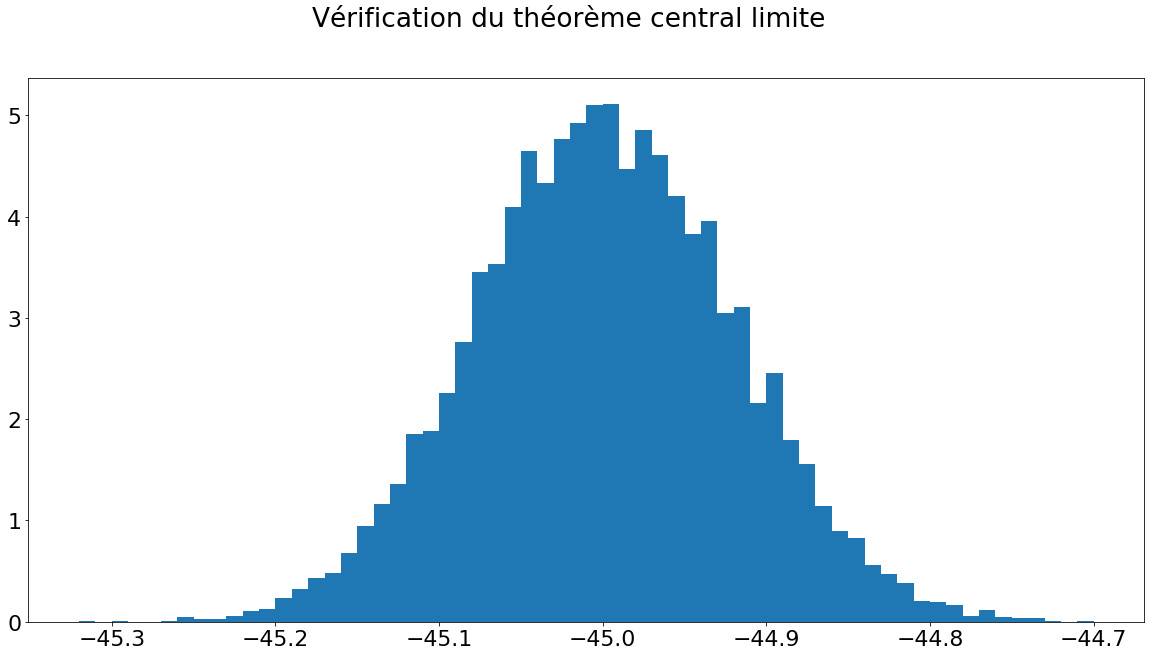

In [8]:
binwidth = 100/taille_echantillon
# count, bins, ignored = plt.hist(echantillon, normed=True)
count, bins, ignored = plt.hist(echantillon, normed=True, bins=np.arange(min(echantillon), max(echantillon) + binwidth, binwidth))
sigma = np.std(echantillon)
mu = np.mean(echantillon)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
ax.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma), linewidth=2, color='r')
plt.suptitle("Vérification du théorème central limite")

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.1.8.</b> </div>

<h2> V.2. File d'attente</h2>

On considère la chaîne de Markov sur $\mathbb{N}$ définie de la manière suivante : $X_{t+1} = F(X_t, U_t)$ avec
$$ F(x, u) = \begin{cases}
	x + (-1)^{{\bf 1}(u > p)} & \text{ si } x > 0,\\
	{\bf 1}(u \leq p) & \text{ si } x = 0.
\end{cases} $$

<p class="bg-primary" style="padding:1em"><b>QUESTION V.2.1.</b> Donnez la matrice de transition de cette chaîne de Markov.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.2.1.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.2.2.</b> Complétez la fonction <code>file_attente</code> puis utilisez le script suivant pour tracer plusieurs trajectoires en fonction de $p$. Quel comportement observez-vous pour $p > 1/2$? Y a-t-il convergence ? Expliquez intuitivement pourquoi.</p>

In [9]:
def file_attente(t_max, p, init):
    X = np.zeros(t_max)
    return X

Text(0,0.5,'X')

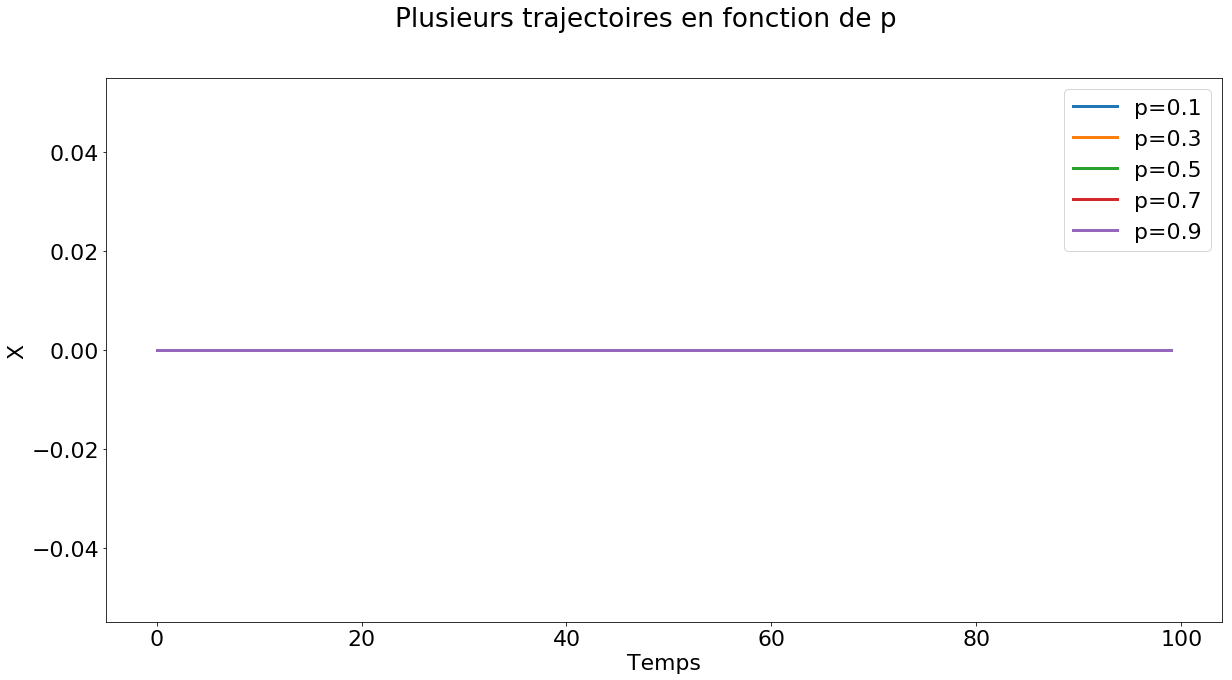

In [10]:
t_max = 10**2
val_p = np.arange(.1,1,.2)
nb_p = len(val_p)

fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    traj = file_attente(t_max, p, 1)
    ax.plot(range(t_max), traj, label="p="+str(p))
plt.legend()
plt.suptitle("Plusieurs trajectoires en fonction de p")
plt.xlabel("Temps")
plt.ylabel("X")

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.2.2.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.2.3.</b> Complétez le script suivant pour montrer que pour $p < 1/2$, le théorème ergodique est satisfait. Vous pouvez utiliser la fonction <code>np.cumsum</code>.</p>

In [11]:
t_max = 10**3
val_p = np.arange(.0,.7,.1)
nb_p = len(val_p)
fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    traj = file_attente(t_max, p, 1)
    ax.plot(range(t_max), # TO DO, label="p="+str(p))
plt.legend()
plt.suptitle("Vérification du théorème ergodique")
plt.xlabel("Temps")
plt.ylabel("Moyenne empirique")

SyntaxError: invalid syntax (<ipython-input-11-babbc6afb6ff>, line 10)

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.2.3.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION V.2.4.</b> Complétez le script suivant pour montrer que pour $p < 1/2$, $X_n$ converge en loi. Parmi la loi de Poisson et la loi géométrique, laquelle choisiriez-vous ?<br>
<b>Indication</b> Comment choisir le paramètre des lois que vous testez ?</p>

In [ ]:
t_max = 10**3
taille_echantillon = 10**4
nb_p = len(val_p)

fig, ax = plt.subplots()
p = .47
echantillon = np.zeros(taille_echantillon)
for j in range(taille_echantillon):
    echantillon[j] = file_attente(t_max, p, 0)[-1]
x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
par_poisson = # TO DO
par_geometrique = # TO DO
ax.step(x, stats.poisson.cdf(x, par_poisson), label="Poisson")
ax.step(x, stats.geom.cdf(x, par_geometrique, label="géométrique")
s, y = ecdf(echantillon)
ax.step(s, y, label="Empirique")
plt.legend()

<div class="alert alert-warning"><b>REPONSE A LA QUESTION V.2.3.</b> </div>

<a id="MCMC"></a><h1 style="border: 5px solid; text-align: center; padding: 10px">VI. Méthodes de Monte-Carlo à base de chaînes de Markov</h1>

<div class="alert alert-success"> Si $(X_n)$ est une chaîne de Markov de mesure stationnaire $f$, alors le théorème ergodique pour les chaînes de Markov garantit que
$$ \displaystyle \widehat I^{\text{MCMC}} = \frac{1}{N} \sum_{k=1}^N \phi(X_k) $$
est un estimateur convergent de $\int \phi f$: on a remplacé un échantillon i.i.d. par la trajectoire d'un processus de Markov, on parle alors de méthode <b>MCMC</b> (par opposition à IIDMC). Cette méthode n'a d'intérêt que si l'on sait générer une chaîne de Markov avec une probabilité stationnaire donnée : l'<b>algorithme de Metropolis-Hastings</b> fait précisément cela, il s'agit de la pierre angulaire des méthodes MCMC.</div>

<h2> VI.1. Algorithme de Metropolis–Hastings</h2>

L'algorithme de Metropolis--Hastings est un algorithme général qui permet de générer une chaîne de Markov avec une distribution invariante donnée. Soit $\pi$ une mesure de probabilité sur un ensemble dénombrable $\mathfrak{X}$ et $K: \mathfrak{X} \times \mathfrak{X} \to [0,1]$ un noyau de transition, *i.e.* pour tout $x \in \mathfrak{X}$ la famille $K(x, \cdot) = (K(x,y), y \in \mathfrak{X})$ définit une mesure de probabilité sur $\mathfrak{X}$. L'algorithme de Metropolis-Hastings construit la chaîne de Markov suivante :
1. Tirer $Y_t$ selon la loi $K(X_t, \, \cdot)$;
2. Calculer
$$ \displaystyle \varrho(X_t, Y_t) = \min \left( 1, \frac{\pi(Y_t)}{\pi(X_t)} \frac{K(Y_t, X_t)}{K(X_t, Y_t)} \right); $$
3. Choisir $\displaystyle X_{t+1} = \begin{cases}
    Y_t & \text{ avec probabilité } \varrho(X_t, Y_t),\\
    X_t & \text{ avec probabilité } 1 - \varrho(X_t, Y_t).
\end{cases} $

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.1.1.</b> Calculez $p_{xy} = P(X_2 = y \mid X_1 = x)$ puis montrez que $\pi_x p_{xy} = \pi_y p_{yx}$. Déduisez-en que $X$ admet $\pi$ comme probabilité stationnaire.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.1.1.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.1.2.</b> Décrivez simplement cet algorithme lorsque le noyau de transition ne dépend pas de l'état de départ, <i>i.e.</i> $K(x, \cdot \,) = k$ pour une certaine mesure de probabilité $k$ et tout $x \in \mathfrak{X}$. Faites le lien avec la méthode du rejet.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.1.2.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.1.3.</b> Décrivez simplement $Y_t$ lorsque le noyau de transition est de la forme $K(x, y) = k(y-x)$.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.1.3.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.1.4.</b> Discutez des utilisations et avantages potentiels de l'algorithme de Metropolis-Hastings.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.1.4.</b> Disvantages : il y a toujours une covariance associé au chaines de markov, le temps d'attente pour obtenir la chaine stationnare peut etre grand. Avantages : il suffit de connais une distribuition proportionel à densité pi pour obtenir la distribuition souhaité, les variables echantillionés pevuent etre correlationées, la fonction pi estime en une dimension une fonction f de dimension d quelconque.</div>

<div class="alert alert-success"> Dans le cas à densité, l'algorithme de Metropolis--Hastings est le même : un noyau de transition est une application $K: \mathbb{R}^d \times \mathbb{R}^d \to [0,1]$ telle que $K(x, \cdot \,)$ est une densité sur $\mathbb{R}^d$ pour chaque $x \in \mathbb{R}^d$, et $\pi$ est remplacée par une densité $f$ sur $\mathbb{R}^d$. </div>

<h2> VI.2. Vitesse de convergence de la méthode MCMC</h2>

La méthode MCMC consiste donc à générer à l'aide de l'algorithme de Metropolis-Hastings une chaîne de Markov ayant une densité cible $f$ comme distribution stationnaire, puis de considérer l'estimateur
$$ \widehat I^{\text{MCMC}} = \frac{1}{N} \sum_{k=1}^N \phi(X_k) $$
qui est convergent par le théorème ergodique pour les chaînes de Markov.

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.2.1.</b> A-t-on comme dans le cas IIDMC $\displaystyle \text{Var}(\widehat I^{\text{MCMC}}) = \frac{\text{Var}(\phi(X_1))}{N}$? Pourquoi?</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.2.1.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.2.2.</b> Proposez une méthode numérique pour estimer $\text{Var}(\widehat I^{\text{MCMC}})$.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.2.2.</b> Nous pouvons simuler les chaines de Markov avec l'algorithme de Metropolis-Hastings sans connaitre la densité cible f. Ensuite, on applique la fonction phi sur la sequénce et on peut l'estimer avec l'estimateur de la variance $s_n^2$.</div>

<h2> VI.3. Méthode MCMC pour l’estimation d'une intégrale sur la sphère</h2>

On revient à l'exemple de la sphère. On propose quatre noyaux de transition pour simuler une chaîne de Markov qui admette la distribution uniforme dans la sphère comme probabilité stationnaire :
* **Noyau uniforme - indépendant:** $K(x, \cdot \,)$ est la mesure uniforme sur $[-1,1]^d$;
* **Noyau uniforme - marche aléatoire:** $K(x, y) \propto {\bf 1}(\lVert y - x \rVert \leq \delta)$;
* **Noyau beta - indépendant:** $K(x, \cdot \,) = g_\theta$ avec $g_\theta$ introduit dans le BE sur l'échantillonnage préférentiel;
* **Noyau gaussien - marche aléatoire:** $K(x, y) \propto \exp \left( -\lVert y - x \rVert^2 / (2 \sigma^2) \right)$.

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.3.1.</b> Décrivez par écrit l'algorithme de Metropolis-Hastings  dans chacun des ces cas.</p>

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.3.1.</b>1. Generer $Y_{t+1}$ selon K($x_t$,); 

</div>

L'objectif de cette section est d'utiliser la chaîne de Markov produite par l'algorithme de Metropolis-Hastings et le théorème ergodique pour estimer la valeur d'une intégrale sur la sphère,
$$ J = \int \phi(x) f_{\mathbb{S}}(x) dx $$
où $f_{\mathbb{S}}$ est la densité de la loi uniforme sur la sphère de rayon $1$ et $\phi(x) = \Vert x \Vert$ est la fonction à intégrer.

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.3.2.</b> Complétez les fonctions <code>estimation_MCMC_XXX</code> qui implantent ces algorithmes de Metropolis-Hastings. Pour vérifier votre code, vous vérifierez numériquement et en petite dimension que ces quatre chaînes de Markov ont bien comme distribution stationnaire la mesure uniforme sur la sphère. Que vaut $J$? Comparez vos résultats avec la valeur attendue.</p>

In [12]:
def estimation_MCMC_unif_ind(dim, taille_echantillon, init):
    estimation = 0
    echantillon = init
    for i in range(taille_echantillon):
        echantillon1 = echantillon
        echantillon2 = stats.uniform.rvs(loc = -1,scale = 2, size = dim)
        
        if(np.linalg.norm(echantillon2) <= 1):
            estimation += np.linalg.norm(echantillon2)
            echantillon = echantillon2
        else: 
            estimation += np.linalg.norm(echantillon1)
            echantillon = echantillon1
    
    return estimation/taille_echantillon

def estimation_MCMC_unif_MA(dim, taille_echantillon, init):
    X = np.zeros((taille_echantillon, dim))
    X[0,:] = init
    
    delta = 1
    
    for i in range(1,taille_echantillon):
        # varie avec la loi prise
        Y = X[i-1] + (delta)*stats.uniform.rvs(loc = -1,scale = 2, size = dim)
        
        fxt = np.linalg.norm(X[i,:]) <= 1
        fyt = np.linalg.norm(Y) <= 1
        
        # varie avec la loi prise
        kxy = 1
        kyx = 1
        
        if(fxt == 0 or kxy == 0):
            X[i] = X[i-1]
        elif (fyt*kyx ):
            X[i] = Y
        else:
            X[i] = X[i-1]
    
    return np.sum(np.linalg.norm(X, axis = 1))/taille_echantillon

def g(x, theta):
    '''
    x est une matrice avec N lignes et d colonnes
    d est la dimension de l'espace
    N est la taille de l'echantillon
    La fonction renvoie un vecteur de longueur N où la k-ème entrée correspond à la fonction g
    appliquée à la k-ème ligne.
    '''
    dimension = x.shape[0]
    taille_echantillon = 1
    c =(2 * special.gamma(2*theta) )/ (4**np.float64(theta) * special.gamma(theta)**2)
    return c**dimension * np.power(np.prod(1 - np.power(np.float64(x), 2), 1), (np.float64(theta) - 1))

def estimation_MCMC_beta(dim, taille_echantillon, init):
    X = np.zeros((taille_echantillon, dim))
    X[0,:] = init
    theta = 7.5
    
    for i in range(1,taille_echantillon):
        # varie avec la loi prise
        Y = 2*stats.beta.rvs(theta,theta, size = dim)-1
        
        fxt = np.linalg.norm(X[i,:]) <= 1
        fyt = np.linalg.norm(Y) <= 1
        
        # varie avec la loi prise
        c =(2 * special.gamma(2*theta) )/ (4**np.float64(theta) * special.gamma(theta)**2)
        
        kxy = c**dim * ((1 - ((X[i,:])**2))**((theta) - 1))
        kyx = c**dim * ((1 - ((Y)**2))**((theta) - 1))
        print(kxy)
        if(fxt == 0 or kxy == 0):
            X[i] = X[i-1]
        elif (fyt*kyx ):
            X[i] = Y
        else:
            X[i] = X[i-1]
    
    return np.sum(np.linalg.norm(X, axis = 1))/taille_echantillon

def estimation_MCMC_gaussien(dim, taille_echantillon, init):
    return 0

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.3.2.</b> </div>

<p class="bg-primary" style="padding:1em"><b>QUESTION VI.3.3.</b> Analysez la performance de ces quatre méthodes d'estimation de l'intégrale : pour chaque algorithme, vous devrez notamment :
<br>
1. tracer l'évolution de l'écart relatif en fonction de la dimension, pour un budget de simulation et des valeurs de paramètres que vous aurez choisis;
<br>
2. discuter l'influence des paramètres (si le noyau en a);
<br>
3. discuter l'influence de la condition initiale $X_0$.
</p>

In [13]:
taille_echantillon = 10**4
dim = 2
init = 0


int1 = estimation_MCMC_unif_ind(dim, taille_echantillon, init)
print("K uniforme, dimension :", dim)
print("Valeur attendue :", dim/(dim+1))
print(int1)

int2 = estimation_MCMC_unif_MA(dim, taille_echantillon, init)
print("K , dimension ", dim)
print(int2)


int3 = estimation_MCMC_beta(dim, taille_echantillon, init)
print("K , dimension ", dim)
print(int3)

K uniforme, dimension : 2
Valeur attendue : 0.6666666666666666
0.666840594507
K , dimension  2
0.662964168033
[ 2.30911507  2.30911507]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
int2 = estimation_MCMC_unif_MA(dim, taille_echantillon)
print("K , dimension ", dim)
print(int2)

int3 = estimation_MCMC_beta(dim, taille_echantillon)
print("K , dimension ", dim)
print(int3)

int4 = estimation_MCMC_gaussien(dim, taille_echantillon)
print("K , dimension ", dim)
print(int4)

<div class="alert alert-warning"><b>REPONSE A LA QUESTION VI.3.3.</b> </div>